<a href="https://colab.research.google.com/github/thdeandrade/portfolio/blob/main/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisando a Violência no Rio de Janeiro**
---
<center><img alt="Melhores destinos -Málaga" width="80%", height=400, src="https://bit.ly/3if5XHk"></center>
<center><a href='https://unsplash.com/photos/7F65HDP0-E0'>Agustin Gargiulo do Unplash </a></center>

*O Rio de Janeiro continua lindo...*

E assim começamos a falar *(ou cantar)* sobre a cidade que inspira o mundo.

Seria injusto afirmar qual momento que mais marcou a fama da cidade do Rio de Janeiro. Em 1928, por exemplo, foi lançado o livro *A cidade maravilhosa* pelo escritor brasileiro Coelho Neto *(carioca, por sinal)* e que, logo nos primeiros capítulos, aborda o Rio de Janeiro como a cidade dos sonhos. Alguns anos se passam e, em 1935, o compositor André Filho apresenta a marchinha *Cidade maravilhosa*, ao carnaval carioca. O sucesso é tanto que, anos mais tarde, a música veio a se tornar Hino da cidade do Rio de Janeiro.

Para quem não conhece a cidade, talvez a frase *Cheia de encantos mil* cantada na marchinha não faça tanto sentido, mas quem já passou por lá sabe muito bem o que isso significa. O Rio de Janeiro vai muito além do povo acolhedor e praias e parques famosos. Quem já passou pelo Cristo Redentor sabe como é um lugar abençoado, e a vista lá de cima encanta até a pessoa mais raivosa.

Mas como diz o dito popular, *nem tudo são flores*. Os casos de violência no Rio de Janeiro vêm se intensificando devido a ação de grupos criminosos, milícias e outros casos com motivos específicos, tais como ameaça, acidentes, etc. A pandemia da COVID-19 também mostrou que a desigualdade e violência andam juntos, sendo intensificada pela diminuição ou falta de renda familiar e assistência social aos mais necessitadas.  A [*Associação Brasileira de Saúde Coletiva (ABRASCO)*](https://bit.ly/363e7gn) fala sobre *violência estrutural* em relação ao ser humano que tem privações de suas necessidades fundamentais, tais como educação, alimentação, saúde, etc. Esse cenário é característico de ambientes com pobreza generalizada e que, por sua vez, acabam por normalizar a violência, morte e impunidade. 

Ao longo dessa discussão, algumas variáveis foram selecionadas para obtermos respostas específicas. Caso queira ir mais a fundo, os dados utilizados estão disponíveis no [*Instituto de Segurança Pública (ISP)*](https://bit.ly/366dMcN),  site oficial do Governo do Estado do Rio de Janeiro. Inclusive, os dados apresentados são estaduais, mas em diversos momentos usamos a capital como exemplo, uma vez que a cidade do Rio de Janeiro é a maior cidade, concentra boa parte população e onde os principais casos de violência são pronunciados.  

## Obtenção dos Dados

Para a análise dos dados, foi feito o download do arquivo em formato *.csv* e armazenado em um repositório [*GitHub*](https://bit.ly/2Uknciq) para facilitar a importação. Algumas manipulações básicas foram necessárias, tais como substituir ponto e vírgula como separador padrão e o preencher espaços em branco com *NaN (Not a Number)*. Já aproveitando, foram utilizadas as variáveis `ano` e `mes` para criar a coluna `ano_mes` no formato `datetime` e que, posteriormente, se tornou o índice do dataframe. Em todas as ações foi selecionado a opção `inplace=True`, permitindo a alteração no arquivo original.

In [31]:
#@title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#importar dataframe original
web = 'https://raw.githubusercontent.com/thdeandrade/portfolio/main/datasets/violencia_rio_1991_2021'
df = pd.read_csv(web, sep=';')

#preencher valores vazios
df.replace(' ', np.NaN, inplace=True)
#cria uma coluna do tipo 'datetime' com ano e mes
df['ano_mes'] = pd.to_datetime(df.ano.astype(str)+'/'+df.mes.astype(str)+'/1')
#define a coluna 'datetime' como índice
df.set_index('ano_mes', inplace=True)

O arquivo de *Estatística e Segurança Pública do estado do Rio de Janeiro* é bastante autoexplicativo e de fácil entendimento. Apesar do grande número informações, foram utilizadas algumas variáveis para análises mais profundas, sendo elas:

* `ano` - ano do registro (1991 - abril/2021).
* `mes` - corresponde aos doze meses do ano, sendo 1 para janeiro, 2 para fevereiro, etc.
* `roubo_veiculo` - roubo do veículo com a presença de violência ou ameaça.
* `furto_veiculo` - roubo de veículo sem o conhecimento imediato do proprietário.
* `recuperacao_veiculo` - veículos recuperados após o roubo ou furto.
* `hom_doloso` - quando uma pessoa tira a vida de outra de forma intencional. 
* `letalidade_violenta` - é a somatória das variáveis `hom_doloso`, `lesao_corp_morte`, `latrocinio` e `hom_por_interv_policial`.
* `pol_civis_mortos_serv` - policiais civis mortos em serviço.
* `pol_militares_mortos_serv` - policiais militares mortos em serviço.

Inicialmente, visualizar as cinco primeiras linhas do dataframe para entender como essas variáveis estão organizadas.

In [33]:
#@title
#imprime as 5 primeiras linhas
df.head()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
ano_mes,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991-01-01,1991,1,657,NaN,15,NaN,NaN,672,162,3051,NaN,NaN,NaN,967,NaN,381,1348,1174,63,350,188,37,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,NaN,3
1991-02-01,1991,2,732,NaN,17,NaN,NaN,749,175,3421,NaN,NaN,NaN,963,NaN,432,1395,1097,64,357,171,35,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,NaN,3
1991-03-01,1991,3,713,NaN,25,NaN,NaN,738,216,3613,NaN,NaN,NaN,963,NaN,422,1385,1265,71,443,191,43,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,NaN,3
1991-04-01,1991,4,634,NaN,20,NaN,NaN,654,200,3211,NaN,NaN,NaN,1186,NaN,354,1540,1415,81,425,199,36,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,NaN,3
1991-05-01,1991,5,650,NaN,20,NaN,NaN,670,146,3051,NaN,NaN,NaN,931,NaN,335,1266,1449,82,553,231,27,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,3


## Análise Inicial dos Dados


O dataframe analisado apresenta 56 variáveis e 364 entradas. Enquanto cada variável se refere a uma forma de violência, cada valor de entrada corresponde ao total de casos registrados em cada mês do ano, indo de 1991 até abril/2021.

In [34]:
#@title
#imprime o número de linhas e colunas
print('~'*15)
print(f'Variáveis: {df.shape[1]}')
print(f'Entradas: {df.shape[0]}')
print('~'*15)

~~~~~~~~~~~~~~~
Variáveis: 56
Entradas: 364
~~~~~~~~~~~~~~~


O dataframe possui registros de diversos tipos de violência, tais como roubo (`roubo_celular`, `roubo_carga`, ..), furto (`furto_celular`, `furto_coletivo`, ..), tráfico de drogas (`apreensao_drogas`, `trafico_drogas`, ..), entre tantos outros. Para entender um pouco mais, vamos visualizar todas as variáveis disponíveis.

In [35]:
#@title
#imprime nome das colunas
df.columns

Index(['ano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio', 'cvli',
       'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
       'roubo_transeunte', 'roubo_celular', 'roubo_em_coletivo', 'roubo_rua',
       'roubo_veiculo', 'roubo_carga', 'roubo_comercio', 'roubo_residencia',
       'roubo_banco', 'roubo_cx_eletronico', 'roubo_conducao_saque',
       'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos',
       'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_

Ao avaliar os dados de cada coluna, o *Pandas* retorna dois tipos bastante comum. Variáveis do tipo `int64` são números inteiros de `64bits` e com valor zero, positivo ou negativo, enquanto as variáveis do tipo `object` são textuais ou um combinado de valores numéricos com não numéricos. Também foi criado uma variável do tipo `datetime64` *(atual índice)* que corresponde a valores de data e hora. 

Além dos citados, existem outros tipos de dados, cada uma com sua particularidade. Para essas e outras informações, utilize o guia de usuário do [*Pandas*](https://bit.ly/363e7gn) como referência. 

In [36]:
#@title
#imprime o tipo das variáveis
df.dtypes

ano                            int64
mes                            int64
hom_doloso                     int64
lesao_corp_morte              object
latrocinio                     int64
cvli                          object
hom_por_interv_policial       object
letalidade_violenta            int64
tentat_hom                     int64
lesao_corp_dolosa              int64
estupro                       object
hom_culposo                   object
lesao_corp_culposa            object
roubo_transeunte               int64
roubo_celular                 object
roubo_em_coletivo              int64
roubo_rua                      int64
roubo_veiculo                  int64
roubo_carga                    int64
roubo_comercio                 int64
roubo_residencia               int64
roubo_banco                    int64
roubo_cx_eletronico           object
roubo_conducao_saque          object
roubo_apos_saque              object
roubo_bicicleta               object
outros_roubos                  int64
t

Além de ser comum encontrar valores nulos em dados reais, são verdadeiros desafios descobrir a maneira ideal de trata-los. Essas situações podem ocorrer por diversas fontes, tais como dados corrompidos ou falhas na hora de carregar a informação. Para lidar com esses problemas, é comum preencher valores com média ou mediana, valores mais frequentes, utilizar técnicas de *Machine Learning* ou, na pior das hipóteses, apagar aquele registro. 
 
Por sorte, a maioria das variáveis utilizadas não tem valores nulos e, por isso, não foi necessário qualquer tratamento. Para as variáveis `pol_militares_mortos_serv`, `pol_civis_mortos_serv` e `hom_por_interv_policial`, os valores nulos foram substituídos pelo número zero, ou seja, a ausência de ocorrências naquela data. 

In [37]:
#@title
#valores ausentes por coluna (em porcentagem)
df.isnull().sum().sort_values(ascending=False) / df.shape[0] *100

furto_bicicleta               75.824176
roubo_bicicleta               75.824176
posse_drogas                  49.450549
cmba                          49.450549
cmp                           49.450549
aaapai                        49.450549
apf                           49.450549
apreensao_drogas_sem_autor    49.450549
trafico_drogas                49.450549
roubo_cx_eletronico           39.560440
roubo_apos_saque              39.560440
extorsao                      39.560440
sequestro_relampago           39.560440
estelionato                   39.560440
roubo_conducao_saque          39.560440
furto_celular                 39.560440
furto_coletivo                39.560440
estupro                       39.560440
pol_militares_mortos_serv     39.560440
pol_civis_mortos_serv         39.560440
pessoas_desaparecidas         36.263736
encontro_ossada               36.263736
roubo_celular                 29.670330
lesao_corp_culposa            26.373626
registro_ocorrencias          26.373626


In [46]:
#@title
#preencher valores nulos com zero
df.hom_por_interv_policial = df['hom_por_interv_policial'].fillna(0).astype(int)
df.pol_militares_mortos_serv = df['pol_militares_mortos_serv'].fillna(0).astype(int)
df.pol_civis_mortos_serv = df['pol_civis_mortos_serv'].fillna(0).astype(int)

## Informações Estatísticas e Visualização de Dados

Com o dataframe pronto é possível realizar análises de maneira rápida e sem complicações. Para ter um panorama geral, o pacote *Pandas* traz a função `.describe()`, que retorna a estatística descritiva de todas as variáveis numéricas. Como resultado, temos a contagem de valores (`count`), média (`mean`), mediana (`50%`), desvio padrão (`std`), valor mínimo (`min`), valor máximo (`max`), primeiro (`25%`) e terceiro quartil (`75%`). 

No caso de variáveis categóricas, a função calcula o valor mais comum (`top`) e sua frequência(`freq`), o número de registros (`count`) e a quantidade de valores únicos (`unique`). Para isso, basta adicionar os comandos `include='O'` ou `include='all'`, para o retorno mostrar apenas variáveis categóricas ou ambas, respectivamente. Vale lembrar que valores numéricos irão aparecer como *NaN* nas informações de variáveis categóricas e vice-versa. 

Genial não?  Agora de volta ao dataframe...


In [39]:
#@title
#mostra a estatística descritiva
df.describe(include='all')

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
count,364.000000,364.000000,364.000000,268,364.000000,268,364.000000,364.000000,364.000000,364.000000,220,280,268,364.000000,256,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,220,220,220,88,364.000000,364.00000,364.000000,364.000000,220,220,88,364.000000,364.000000,268,220,220,220,364.000000,184,184,184,364.000000,184,184,184,184,268,232,364.000000,232,364.000000,364.000000,268,364.000000
unique,NaN,NaN,NaN,15,NaN,185,NaN,NaN,NaN,NaN,156,139,249,NaN,229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,28,130,24,NaN,NaN,NaN,NaN,188,199,55,NaN,NaN,6,112,23,214,NaN,169,166,102,NaN,172,162,174,101,262,151,NaN,11,NaN,NaN,268,NaN
top,NaN,NaN,NaN,2,NaN,541,NaN,NaN,NaN,NaN,257,153,3600,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,8,156,0,NaN,NaN,NaN,NaN,860,1370,0,NaN,NaN,0,152,7,1752,NaN,308,373,201,NaN,2937,780,1443,43,6810,396,NaN,2,NaN,NaN,71895,NaN
freq,NaN,NaN,NaN,49,NaN,4,NaN,NaN,NaN,NaN,4,7,3,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,21,5,17,NaN,NaN,NaN,NaN,3,2,17,NaN,NaN,160,5,28,2,NaN,3,3,6,NaN,3,3,2,6,2,5,NaN,47,NaN,NaN,1,NaN
mean,2005.670330,6.456044,493.458791,NaN,15.244505,NaN,57.964286,569.807692,321.299451,5437.131868,NaN,NaN,NaN,3461.730769,NaN,670.906593,4835.596154,2440.912088,345.445055,446.527473,129.840659,8.906593,NaN,NaN,NaN,NaN,1223.623626,9526.68956,1643.920330,1489.637363,NaN,NaN,NaN,5997.766484,10398.689560,NaN,NaN,NaN,NaN,1109.802198,NaN,NaN,NaN,1753.521978,NaN,NaN,NaN,NaN,NaN,NaN,63.901099,NaN,1.225275,0.200549,NaN,2.989011
std,8.770166,3.465015,120.148994,NaN,6.011293,NaN,46.727230,108.527212,125.204036,1504.381910,NaN,NaN,NaN,2411.852591,NaN,298.820089,3169.132976,777.505454,219.607049,122.669265,45.587284,10.459264,NaN,NaN,NaN,NaN,781.700572,4508.94578,314.759555,960.908426,NaN,NaN,NaN,1927.471308,3639.875334,NaN,NaN,NaN,NaN,646.103975,NaN,NaN,NaN,647.916808,NaN,NaN,NaN,NaN,NaN,NaN,34.939792,NaN,1.667653,0.515223,NaN,0.104394
min,1991.000000,1.000000,239.000000,NaN,2.000000,NaN,0.000000,297.000000,122.000000,2350.000000,NaN,NaN,NaN,688.000000,NaN,281.000000,1086.000000,1097.000000,59.000000,169.000000,38.000000,0.000000,NaN,NaN,NaN,NaN,81.000000,3261.00000,904.000000,255.000000,NaN,NaN,NaN,2322.000000,4691.000000,NaN,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,729.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,2.000000
25%,1998.000000,3.000000,395.750000,NaN,11.000000,NaN,18.750000,488.000000,202.000000,4055.750000,NaN,NaN,NaN,1070.500000,NaN,437.750000,1645.250000,1888.000000,212.750000,355.750000,98.000000,2.000000,NaN,NaN,NaN,NaN,822.750000,5331.50000,1411.500000,725.250000,NaN,NaN,NaN,4041.250000,6718.500000,NaN,NaN,NaN,NaN,736.000000,NaN,NaN,NaN,1248.000000,NaN,NaN,NaN,NaN,NaN,NaN,39.000000,NaN,0.000000,0.000000,NaN,3.000000
50%,2006.000000,6.000000,496.500000,NaN,15.000000,NaN,53.000000,581.500000,325.000000,5683.000000,NaN,NaN,NaN,3327.000000,NaN,602.000000,4557.000000,2316.000000,294.000000,424.000000,123.000000,4.000000,NaN,NaN,NaN,NaN,1167.500000,9363.00000,1617.500000,1044.000000,NaN,NaN,NaN,6533.500000,10367.500000,NaN,NaN,NaN,NaN,995.500000,NaN,NaN,NaN,1734.500000,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,NaN,0.500000,0.000000,NaN,3.000000
75%,2013.000000,9.000000,573.000000,NaN,19.000000,NaN,90.000000,643

Com a facilidade de deslocamento nas grandes cidades e a praticidade dos aplicativos de transporte, existem aqueles que escolhem não usar carro em diversas ocasiões *(ou na vida)*. Mas se você é daqueles que não abre mão do conforto e praticidade, existem alguns cuidados a serem tomados.

Segundo o relatório *Geografia dos roubos de veículos na cidade do Rio de Janeiro*, de [*Leonarda Musumeci e Greice Conceição (2007)*](https://bit.ly/3qctKLZ), do total de ocorrências registradas no Disque-Denúncia RJ entre os anos de 1995 a 2006, os casos de roubo de carros (8%) perdem apenas para o tráfico de drogas (32.8%). Somente a cidade do Rio de Janeiro foi responsável por 71.4% dos registros, com 12.156 ocorrências. 

O dataset mostra que o estado do Rio de Janeiro possui uma média mensal de 2440 registros de `roubo_veiculo` e 1643 registros para `furto_veículo` no período de 1991 até abril/21. Do total, apenas 1753 ocorrências, em média, retornam *(ou não)* para seus dono, como monstra a variável `recuperacao_veiculos`. 

Ao calcular a variável `recuperacao_veiculos` em relação a soma das variáveis `roubo_veiculo` e `furto_veículo`, observa-se que aproximadamente 43% das ocorrências são solucionadas. E aí, como anda o seguro do seu carro?



In [40]:
#@title
print('~~'*20)
print(f'    Média mensal para as variáveis: ')
print('~~'*20)

#média da variável roubo_veiculos
media_roubo_veiculo = df.roubo_veiculo.mean()
print(f'roubo_veiculo:\t\t\t{round(media_roubo_veiculo, 2)}')

#média da variável furto_veiculos
media_furto_veiculo = df.furto_veiculos.mean()
print(f'furto_veiculos:\t\t\t{round(media_furto_veiculo, 2)}')

#média da variável recuperacao_veiculos
media_recuperacao_veiculo = df.recuperacao_veiculos.mean()
print(f'recuperacao_veiculos:\t\t{round(media_recuperacao_veiculo, 2)}')

#porcentagem de veículos recuperados
porc = media_recuperacao_veiculo/(media_furto_veiculo+media_roubo_veiculo)*100
print(f'Veiculos recuperados: \t\t{round(porc, 2)}%')
print('~~'*20)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    Média mensal para as variáveis: 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
roubo_veiculo:			2440.91
furto_veiculos:			1643.92
recuperacao_veiculos:		1753.52
Veiculos recuperados: 		42.93%
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Como alternativa, o ônibus é bastante utilizado para o deslocamento em geral. O coletivo costuma ser bastante procurado por se deslocar por mais pontos que o metrô, ser mais rápido que ir de bicicleta ou caminhando e mais barato que manter um carro. Para as cidades, inclusive, com mais pessoas utilizando o transporte, ocorre a diminuição da emissão de gases poluentes, reduz o congestionamento e ocupação das vias, etc. 

A capacidade de pessoas que costuma caber dentro desses ônibus pode variar de acordo com o modelo do automóvel e a região. E por falar em região, não marque bobeira ao utilizar o transporte. De acordo com o artigo publicado no [*Diário do Rio*](https://bit.ly/3hF4YkP), três quartos dos assaltos em coletivos foram praticados na zona norte e zona oeste na cidade do Rio de janeiro. 

De 1991 até agora, a variável `roubo_em_coletivo` tem registrados uma média de 671 ocorrências por mês, com mínima de 281 e máxima de 1628. A má notícia que os dados nos mostra que parece piorar ao longo dos anos. Até maio de 2021 tinham sido registrados 1003 casos de roubo em coletivo.

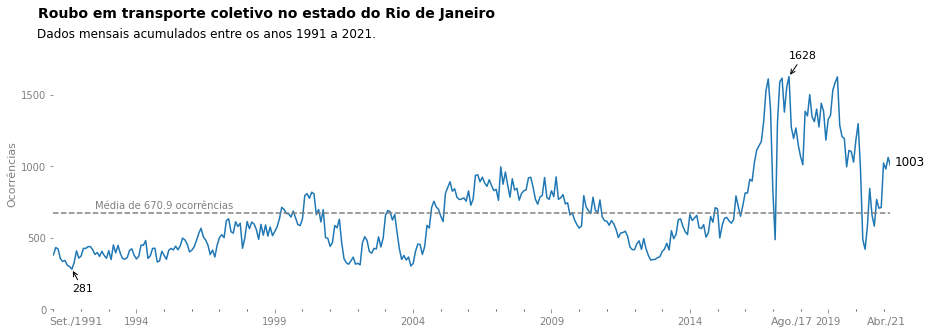

In [41]:
#@title
fig, ax = plt.subplots(figsize=(15,5))

df.roubo_em_coletivo.plot()
plt.title('Roubo em transporte coletivo no estado do Rio de Janeiro', x=0.255, y=1.05, fontsize=14, fontweight='bold')
plt.text(245, 1900, 'Dados mensais acumulados entre os anos 1991 a 2021.', fontsize=12)

media_roubo_em_coletivo = df.roubo_em_coletivo.mean()
ax.axhline(y=media_roubo_em_coletivo, linestyle='--', color='grey', linewidth=1.5)
plt.text(270, media_roubo_em_coletivo+30, f"Média de {round(media_roubo_em_coletivo,1)} ocorrências", color='grey')
plt.text(617, df.roubo_em_coletivo.loc['2021-04-01'], df.roubo_em_coletivo.loc['2021-04-01'], fontsize=12)

ax.annotate(df.roubo_em_coletivo.min(), xytext=('1991-09-01', 125), fontsize=11, 
            xycoords='data', xy=('1991-09-01', df.roubo_em_coletivo.min()),
            arrowprops=dict(arrowstyle='->'))
plt.text(250, -108, 'Set./1991', fontsize=11, color='grey')

ax.annotate(df.roubo_em_coletivo.max(), xytext=('2017-08-01', 1750), fontsize=11,
            xycoords='data', xy=('2017-08-01', df.roubo_em_coletivo.max()),
            arrowprops=dict(arrowstyle='->'))
plt.text(563, -108, 'Ago./17', fontsize=11, color='grey')
plt.text(605, -108, 'Abr./21', fontsize=11, color='grey')

plt.ylim(0, 1900)
plt.yticks(np.arange(0, max(df.roubo_em_coletivo), 500))

ax.set_ylabel('Ocorrências', fontsize=11, color='grey')
ax.set_xlabel('')
ax.tick_params(axis='both', colors='grey')

for ax, spine in ax.spines.items():
  spine.set_visible(False)

plt.show()

No caso da variável `hom_doloso`, observa-se um comportamento diferente do que foi visto anteriormente. O valor mínimo encontrado foi de 831 registros em janeiro de 1995 e o valor máximo foi de 239 em setembro de 2020. Em relação a média, a quantidade de ocorrência diminuiu consideravelmente, mas não se engane, esses valores são casos pontuais. Vamos analisar um pouco mais a respeito da variável.  

In [42]:
#@title
#valor mínimo para hom_doloso
hom_dol_min = df.hom_doloso.min()
hom_dol_min_mes = df.loc[df['hom_doloso'] == hom_dol_min].mes[0]
hom_dol_min_ano = df.loc[df['hom_doloso'] == hom_dol_min].ano[0]
print(f'O mínimo de registros para hom_doloso foi de {hom_dol_min}. O fato aconteceu no mês {hom_dol_min_mes} do ano {hom_dol_min_ano}')

#valor máximo para hom_doloso
hom_dol_max = df.hom_doloso.max()
hom_dol_max_mes = df.loc[df['hom_doloso'] == hom_dol_max].mes[0]
hom_dol_max_ano = df.loc[df['hom_doloso'] == hom_dol_max].ano[0]
print(f'O máximo de registros para hom_doloso foi de {df.hom_doloso.max()}. O fato aconteceu no mês {hom_dol_max_mes} do ano {hom_dol_max_ano}')

#valor médio para hom_doloso
print(f'A média para a variável é de {round(df.hom_doloso.mean(), 2)} com desvio padrão de {round(df.hom_doloso.std(), 2)}.')

O mínimo de registros para hom_doloso foi de 239. O fato aconteceu no mês 9 do ano 2020
O máximo de registros para hom_doloso foi de 831. O fato aconteceu no mês 1 do ano 1995
A média para a variável é de 493.46 com desvio padrão de 120.15.


Ao analisar o comportamento da variável `hom_doloso`, percebe-se que a dispersão está focada principalmente entre 200 e 800 registros. Também é possível observar um pico entre 500 e 600 registros aproximadamente, indicando os valores mais comuns. Aplicando um filtro nesses valores *(comando abaixo)*,  e possível visualizar que aproximadamente 39% dos dados pertencem a esse grupo. 

> `(df[(df['hom_doloso'] >= 500) & (df['hom_doloso'] <= 600)].hom_doloso.count()) / df.hom_culposo.count() * 100`

Como visto em resultados anteriores e no próprio gráfico de dispersão, esse grupo de 500 a 600 registros de `hom_doloso` encontra-se acima da média. A parte 'boa' é que a média está próxima da mediana, podendo considerar uma distribuição próxima ao normal e, aparentemente, os dados não apresentam outlier.

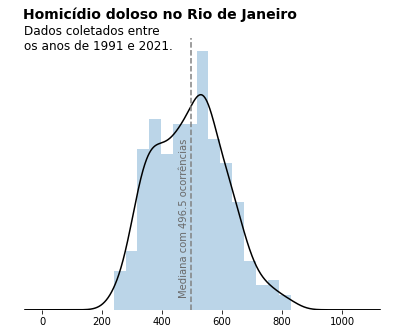

In [43]:
#@title
fix, ax = plt.subplots(figsize= (7,5))

plt.title('Homicídio doloso no Rio de Janeiro', x=0.39, y=1.05, fontsize=14, fontweight="bold")
plt.text(-60, 0.0037, 'Dados coletados entre \nos anos de 1991 e 2021.', fontsize=12)
df.hom_doloso.plot(kind='hist', bins=15, alpha=0.3, density=True)
df.hom_doloso.plot(kind='kde', color='black')

ax.set_yticks([])
ax.set_ylabel('')

ax.axvline(x=df.hom_doloso.quantile(q=0.5), color='grey', linestyle='--', linewidth=1.5)
plt.text(df.hom_doloso.quantile(q=0.5)-40, 0.00020, f'Mediana com {df.hom_doloso.quantile(q=0.5)} ocorrências', color='dimgrey', rotation=90)

for ax, spine in ax.spines.items():
  spine.set_visible(False)

plt.show()

A distribuição ao longo dos anos mostra que o valor de registros na variável `hom_doloso`, apesar das oscilações, vem diminuindo. [*Cardoso e colaboradores (2016)*](https://bit.ly/3wHbaOt) mostraram que, no ano da publicação do trabalho, as taxas de homicídio doloso regrediram 17% no estado do Rio de Janeiro e 38.6% na capital. Contudo, os dados mostram o aumento da variável `letalidade_violenta`, e parte disso se deve a demonstração de poder entre facções criminosas, milícias e organizações policiais. 

E por falar em organizações policiais, o gráfico mostra uma tendência de alta para a variável `hom_por_interv_policial`. Nesse sentido, é importante conhecer a realidade das polícias do estado e discutir critérios eficientes para avaliar as melhores práticas e o tipo de força empregada durante as operações. Vale lembrar que o estado do Rio de Janeiro possui a [maior letalidade policial desde 2013](https://bit.ly/3z98I3U), com uma média de 3 pessoas mortas por dia em 2020.  

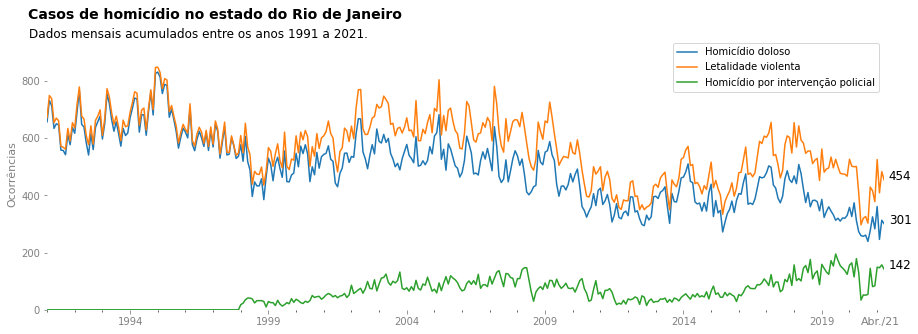

In [47]:
#@title
fig, ax = plt.subplots(figsize=(15,5))

plt.title('Casos de homicídio no estado do Rio de Janeiro', x=0.20, y=1.05, fontsize=14, fontweight='bold')
plt.text(244, 950, 'Dados mensais acumulados entre os anos 1991 a 2021.', fontsize=12)
df.hom_doloso.plot()
df.letalidade_violenta.plot()
df.hom_por_interv_policial.plot()

plt.text(617, df.hom_doloso.loc['2021-04-01'], df.hom_doloso.loc['2021-04-01'], fontsize=12)
plt.text(617, df.letalidade_violenta.loc['2021-04-01'], df.letalidade_violenta.loc['2021-04-01'], fontsize=12)
plt.text(617, df.hom_por_interv_policial.loc['2021-04-01'], df.hom_por_interv_policial.loc['2021-04-01'], fontsize=12)
plt.text(605, -52, 'Abr./21', fontsize=11, color='grey')
plt.ylim(0, 950)

ax.set_ylabel('Ocorrências', fontsize=11, color='grey')
ax.set_xlabel('')
ax.tick_params(axis='both', colors='grey')

for ax, spine in ax.spines.items():
  spine.set_visible(False)

plt.legend(['Homicídio doloso', 'Letalidade violenta', 'Homicídio por intervenção policial'])
plt.show()

Mas *julgar o livro pela capa* não é tão simples assim. O estado do Rio de Janeiro apresentou em 2020 a [maior taxa de policiais mortos proporcionais a população](https://bit.ly/2UYWxbj) (2.53 mortes por milhão de habitantes). Em número absoluto, o estado do Rio de Janeiro ocupou a segunda posição, com 39 mortes, atrás apenas do estado de São Paulo, com 49 mortes.

Mesmo com o ajuste dos dados feitos anteriormente, a realidade continua a mesma. É possível observar que os casos de mortes envolvendo policiais civis e militares em serviço é frequente. Também fica evidente que policiais militares morrem mais em serviço que os policiais civis. De janeiro de 2001 até abril de 2021, temos uma média de 1.83 policiais militares para 0.3 policiais civis. 

In [58]:
#@title
#calcula a média 
pol_mil_media = df.pol_militares_mortos_serv.loc['2001-01-01':].mean()
print(f'Média de policiais militares mortos em serviço: {round(pol_mil_media,2)}')

pol_civ_media = df.pol_civis_mortos_serv.loc['2001-01-01':].mean()
print(f'Média de policiais civis mortos em serviço: {round(pol_civ_media, 2)}')

Média de policiais militares mortos em serviço: 1.83
Média de policiais civis mortos em serviço: 0.3


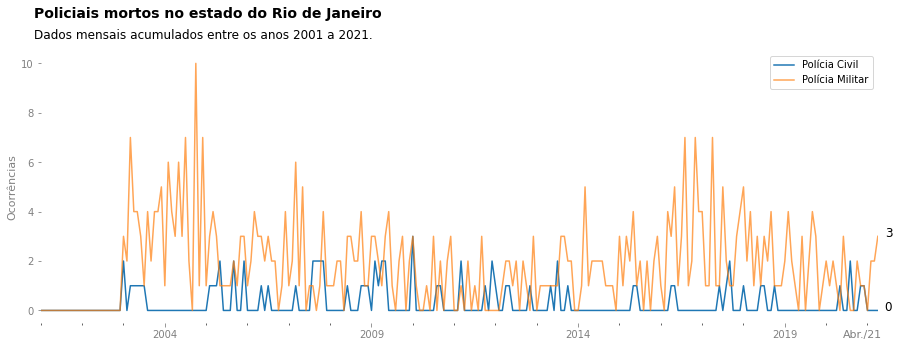

In [45]:
#@title
fig, ax = plt.subplots(figsize=(15,5))

plt.title('Policiais mortos no estado do Rio de Janeiro', x=0.20, y=1.1, fontsize=14, fontweight='bold')
plt.text(370, 11, 'Dados mensais acumulados entre os anos 2001 a 2021.', fontsize=12)


df.pol_civis_mortos_serv.loc['2001-01-01':].plot()
df.pol_militares_mortos_serv.loc['2001-01-01':].plot(alpha=0.7)

plt.text(617, df.pol_militares_mortos_serv.loc['2021-04-01'], df.pol_militares_mortos_serv.loc['2021-04-01'], fontsize=12)
plt.text(617, df.pol_civis_mortos_serv.loc['2021-04-01'], df.pol_civis_mortos_serv.loc['2021-04-01'], fontsize=12)
plt.text(605, -1.1, 'Abr./21', fontsize=11, color='grey')

ax.set_ylabel('Ocorrências', fontsize=11, color='grey')
ax.set_xlabel('')
ax.tick_params(axis='both', colors='grey')

for ax, spine in ax.spines.items():
  spine.set_visible(False)

plt.legend(['Polícia Civil', 'Polícia Militar'])
plt.show()

E toda essa violência não para por aí. Para [*Calderon-Anyosa e colaboradores (2021)*](https://bit.ly/36DWKmw), a presença da COVID-19 não trouxe apenas impactos na saúde da população, mas sim uma mudança abrupta na forma de se viver. Com a política de isolamento e a falta de assistência adequada, a saúde mental de muitas pessoas foi abalada e, se somado com a diminuição de renda e/ou contato social, esse mal pode piorar ainda mais a situação. Mudanças tão radicais intensificam crimes violentos, inclusive, dentro das próprias casas. [*Mazza e colaboradores (2020)*](https://bit.ly/3yX4oVA) definem a violência doméstica uma forma de intimidação do parceiro por violência sexual, física, emocional ou perseguição. 

O artigo publicado na revista [*Piauí*](https://bit.ly/36IB48R) mostrou que, durante a pandemia, 13.4 milhões de brasileiras sofreram com algum tipo de violência doméstica. Se avaliarmos de outra perspectiva, isso corresponde a aproximadamente 25 casos de violência a cada minuto *(sim, a cada minuto)*. Por parte do estado do Rio de Janeiro, o *Ministério Público* possui o [*Núcleo de Gênero*](https://bit.ly/3r8Bgbb) como forma estratégica de combate e prevenção à violência contra a mulher.

# Conclusão



Os dados do Instituto de Segurança Pública do Estado do Rio de Janeiro em conjunto com a biblioteca *Pandas* possibilitou manipular as informações de maneira simples e no seu formato original. Com a união de funções de finalidades diferentes em um mesmo comando, foi possível agregar valor com o resultado de dados ausentes e em porcentagem para cada variável. Em conjunto com a biblioteca [*Matplotlib*](https://bit.ly/3ieiGKr), os dados foram apresentados de maneira clara e rico em detalhes.

A partir das variáveis `roubo_veiculo` e `furto_veiculos` em relação a variável `recuperacao_veiculos`, foi verificado que pouco mais de 40% dos proprietários conseguem recuperar os seus bens. Para quem pensa em trocar migrar para transporte coletivo, deve ter o cuidado de saber por onde anda. Os dados indicaram que o número de `roubo_em_coletivo` vem crescendo de maneira preocupante no estado do Rio de Janeiro.

Os casos de `hom_doloso` diminuíram consideravelmente de 1991 a 2021, segundo consta nos dados de violência no estado do Rio de Janeiro. Apesar da `letalidade_violenta` acompanhar esse comportamento, a intensidade e aumento dessa ação como prova de força de determinados grupos é de preocupação da população em geral. Infelizmente, as ocorrências de policiais mortos em serviço segue o aumento da violência do estado.

Os dados apresentados até aqui são uma pequena parcela de tudo que o Instituto de Segurança Pública armazena. Para saber mais, é possível ter acesso ao Dashboard interativo do [*ISP*](http://www.ispvisualizacao.rj.gov.br/index.html).

Apesar de tudo do que foi discutido, o estado do Rio de Janeiro *(em especial, a capital)* continua sendo um dos destinos preferidos dos brasileiros e extrangeiros em geral. Vale muito a penas conhecer o Rio, só não esquece o protetor solar e não fique de bobeira, tá? 